Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 12.39

Classification of digit images from the celebrated MNIST using a softmax-regression model\
Topics and relevant videos: [Softmax regression, overfitting, regularization](https://www.youtube.com/watch?v=nr1WUhjFeH8) 

Author: Carlos Fernandez-Granda\
Data source: https://yann.lecun.com/exdb/mnist/

In [7]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

font_size = 15
font_size_legend = 15
font_size_ticks = 15

In [8]:
mnist = fetch_openml("mnist_784")

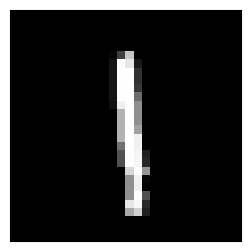

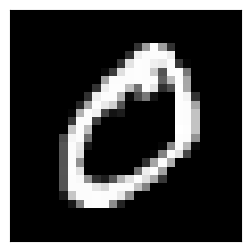

In [9]:
data = mnist.data.to_numpy()

plt.figure(figsize = (3,3))
plt.imshow(data[8,:].reshape(28,28), cmap=plt.cm.gray, 
interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.figure(figsize = (3,3))
plt.imshow(data[1,:].reshape(28,28), cmap=plt.cm.gray, 
interpolation='nearest')
plt.xticks(())
plt.yticks(());

In [10]:
# We divide the data into a training and a test set
np.random.seed(2023)
n_test = 35000
n_total = mnist.target.shape[0]
aux_ind = np.random.permutation(range(n_total))
ind_test = aux_ind[:n_test]
ind_train = aux_ind[n_test:]

data_train = data[ind_train,:]
labels_train = mnist.target[ind_train]
data_test = data[ind_test,:]
labels_test = mnist.target[ind_test]

In [11]:
# We standardize the data
scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

In [18]:
# We fit a softmax model without regularization
# For the book, we set the maximum number of iterations very high and the tolerance low to make sure
# we minimize the unregularized cost function (this will take a while!)
# logistic_model = LogisticRegression(solver='lbfgs',penalty=None,multi_class='multinomial',tol=1e-4,max_iter=100000,
#                                    verbose=1,warm_start=True).fit(data_train, labels_train);
logistic_model = LogisticRegression(solver='lbfgs',penalty=None,multi_class='multinomial',tol=1e-4,max_iter=10000,
                                    verbose=0,warm_start=False).fit(data_train, labels_train);

In [20]:
print("Without regularization\n")
train_score = logistic_model.score(data_train, labels_train)
test_score = logistic_model.score(data_test, labels_test)
print("Training accuracy",round(train_score,3))
print("Test accuracy",round(test_score,3))

predicted_prob_train = logistic_model.predict_proba(data_train)
llk_train = log_loss(labels_train, predicted_prob_train)    
print("Training negative log-likelihood",round(llk_train,3))
predicted_prob_test = logistic_model.predict_proba(data_test)
llk_test = log_loss(labels_test, predicted_prob_test)    
print("Test negative log-likelihood",round(llk_test,3))

Without regularization

Training accuracy 0.956
Test accuracy 0.898
Training negative log-likelihood 0.154
Test negative log-likelihood 0.583


In [21]:
# We fit a softmax model with l2-norm regularization
logistic_model_reg = LogisticRegression(solver='lbfgs',penalty='l2',C=0.01,multi_class='multinomial',tol=1e-4,max_iter=100000,
                                    verbose=0).fit(data_train, labels_train)

In [22]:
print("With regularization\n")
train_score = logistic_model_reg.score(data_train, labels_train)
test_score = logistic_model_reg.score(data_test, labels_test)
print("Training accuracy",round(train_score,3))
print("Test accuracy",round(test_score,3))

predicted_prob_train_reg = logistic_model_reg.predict_proba(data_train)
llk_train_reg = log_loss(labels_train, predicted_prob_train_reg)    
print("Training negative log-likelihood",round(llk_train_reg,3))
predicted_prob_test_reg = logistic_model_reg.predict_proba(data_test)
llk_test_reg = log_loss(labels_test, predicted_prob_test_reg)    
print("Test negative log-likelihood",round(llk_test_reg,3))

With regularization

Training accuracy 0.938
Test accuracy 0.922
Training negative log-likelihood 0.221
Test negative log-likelihood 0.286


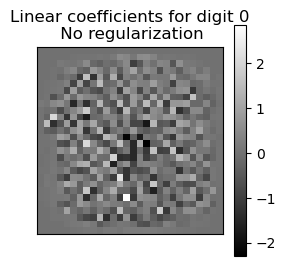

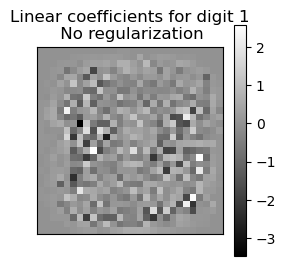

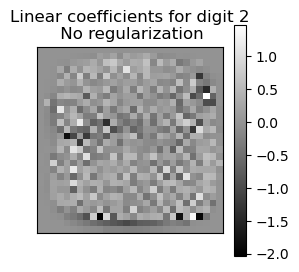

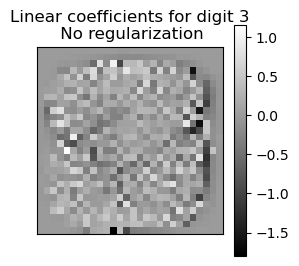

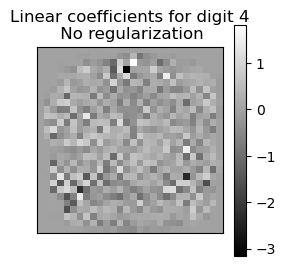

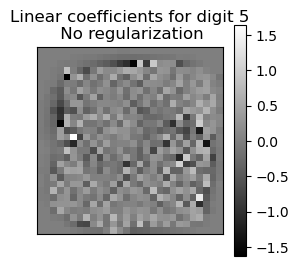

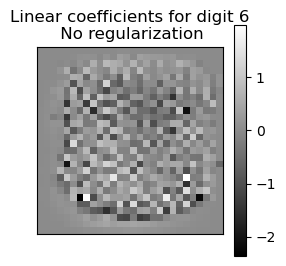

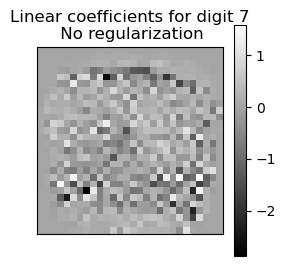

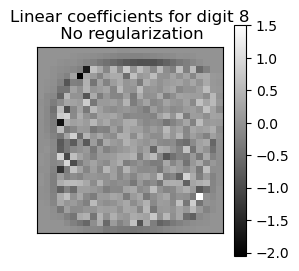

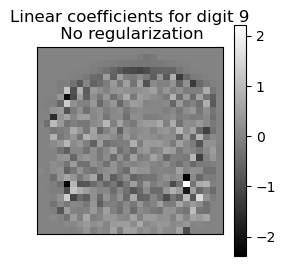

In [33]:
coefs = logistic_model.coef_.copy()

for i in range(10):
    plt.figure(figsize=(3, 3))
    im = plt.imshow(
        coefs[i].reshape(28, 28),
        interpolation="nearest",
        cmap="gray"
    )
    plt.xticks(())
    plt.yticks(())
    cbar = plt.colorbar(im)
    plt.title("Linear coefficients for digit " + str(i) + "\n No regularization");

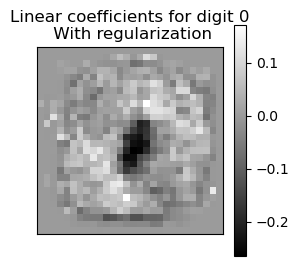

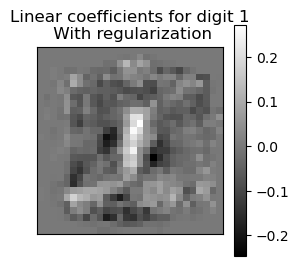

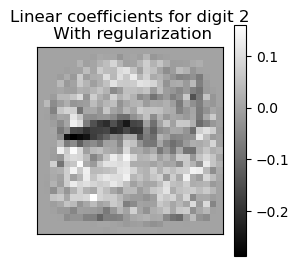

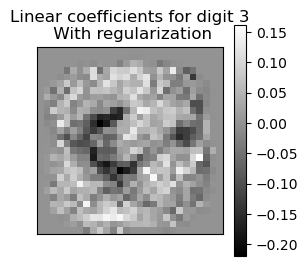

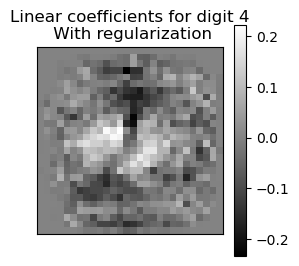

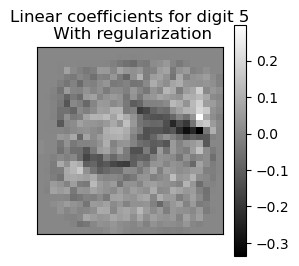

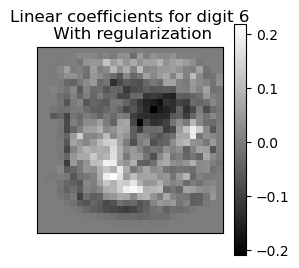

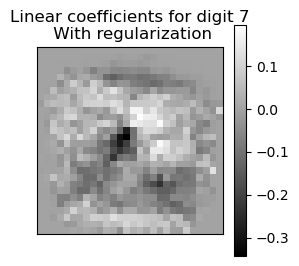

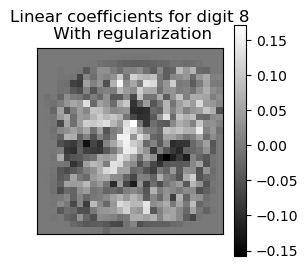

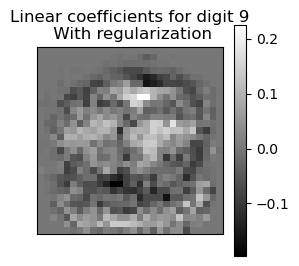

In [32]:
coefs_reg = logistic_model_reg.coef_.copy()

for i in range(10):
    plt.figure(figsize=(3, 3))
    im = plt.imshow(
        coefs_reg[i].reshape(28, 28),
        interpolation="nearest",
        cmap="gray",
    )
    plt.xticks(())
    plt.yticks(())
    cbar = plt.colorbar(im)
    plt.title("Linear coefficients for digit " + str(i) + "\n With regularization");